In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
#load mutations table for RNAP
mutations = pd.read_csv('data/RNAP_MUTATIONS.csv')
mutations

,UNIQUEID,GENE,MUTATION,REF,ALT,NUCLEOTIDE_NUMBER,NUCLEOTIDE_INDEX,GENE_POSITION,CODES_PROTEIN,INDEL_LENGTH,INDEL_NUCLEOTIDES,AMINO_ACID_NUMBER,AMINO_ACID_SEQUENCE,NUMBER_NUCLEOTIDE_CHANGES,IS_MINOR_ALLELE,MINOR_MUTATION,FRS
0,site.01.subj.DR0682.lab.DR0682.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN
1,site.01.subj.DR0682.lab.DR0682.iso.1,rpoB,A1075A,gct,gcc,NaN,NaN,1075.0,True,NaN,NaN,1075.0,A,1.0,False,NaN,NaN
2,site.01.subj.DR0674.lab.DR0674.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN
3,site.01.subj.DR0674.lab.DR0674.iso.1,rpoB,E561E,gag,gaa,NaN,NaN,561.0,True,NaN,NaN,561.0,E,1.0,False,NaN,NaN
4,site.01.subj.DR0134.lab.DR0134.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176550,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoB,1326_del_gttgaccca,NaN,NaN,1326.0,761132.0,1326.0,True,-9.0,gttgaccca,NaN,NaN,NaN,False,NaN,NaN
176551,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,A172V,gcc,gtc,NaN,NaN,172.0,True,NaN,NaN,172.0,V,1.0,False,NaN,NaN
176552,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,R173R,cgg,agg,NaN,NaN,173.0,True,NaN,NaN,173.0,R,1.0,False,NaN,NaN
176553,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,P601L,ccg,ctg,NaN,NaN,601.0,True,NaN,NaN,601.0,L,1.0,False,NaN,NaN


In [22]:
#load known resistance mutations from EFFECTS table
effects = pd.read_pickle('data/EFFECTS.pkl.gz')
effects.reset_index(inplace = True)
effects['GENE_MUTATION'] = effects['GENE'].astype(str) + '_' + effects['MUTATION']
effects = effects[(effects.DRUG=='RIF') & (effects.PREDICTION=='R') 
                  & (~effects.MUTATION.str[-1].isin(['O','X']))]

resistance_mutations = effects.GENE_MUTATION.unique()
len(resistance_mutations)

128

In [23]:
#load list of CMs from previous paper
CMs = pd.read_csv('data/final_CM_hit_list.csv')
CMs = CMs[CMs.homoplasy == True]
CMs

compensatory_mutations = CMs['putative CM'].unique()
len(compensatory_mutations)

51

In [24]:
#add resistance and compensatory mutation flags to mutations table: need to check for minor allele before concatenating GENE_MUTATION 
mutations['GENE_MUTATION'] = np.where(
    mutations['IS_MINOR_ALLELE'],  # Condition: if IS_MINOR_ALLELE is True
    mutations['GENE'].astype(str) + '_' + mutations['MINOR_MUTATION'].astype(str),  # Then: use GENE + MINOR_MUTATION
    mutations['GENE'].astype(str) + '_' + mutations['MUTATION'].astype(str)  # Else: use GENE + MUTATION
)
    
mutations['RESISTANT_MUTATION'] = mutations['GENE_MUTATION'].isin(resistance_mutations)
mutations['COMPENSATORY_MUTATION'] = mutations['GENE_MUTATION'].isin(compensatory_mutations)

mutations

,UNIQUEID,GENE,MUTATION,REF,ALT,NUCLEOTIDE_NUMBER,NUCLEOTIDE_INDEX,GENE_POSITION,CODES_PROTEIN,INDEL_LENGTH,INDEL_NUCLEOTIDES,AMINO_ACID_NUMBER,AMINO_ACID_SEQUENCE,NUMBER_NUCLEOTIDE_CHANGES,IS_MINOR_ALLELE,MINOR_MUTATION,FRS,GENE_MUTATION,RESISTANT_MUTATION,COMPENSATORY_MUTATION
0,site.01.subj.DR0682.lab.DR0682.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN,rpoB_S450L,True,False
1,site.01.subj.DR0682.lab.DR0682.iso.1,rpoB,A1075A,gct,gcc,NaN,NaN,1075.0,True,NaN,NaN,1075.0,A,1.0,False,NaN,NaN,rpoB_A1075A,False,False
2,site.01.subj.DR0674.lab.DR0674.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN,rpoB_S450L,True,False
3,site.01.subj.DR0674.lab.DR0674.iso.1,rpoB,E561E,gag,gaa,NaN,NaN,561.0,True,NaN,NaN,561.0,E,1.0,False,NaN,NaN,rpoB_E561E,False,False
4,site.01.subj.DR0134.lab.DR0134.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN,rpoB_S450L,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176550,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoB,1326_del_gttgaccca,NaN,NaN,1326.0,761132.0,1326.0,True,-9.0,gttgaccca,NaN,NaN,NaN,False,NaN,NaN,rpoB_1326_del_gttgaccca,True,False
176551,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,A172V,gcc,gtc,NaN,NaN,172.0,True,NaN,NaN,172.0,V,1.0,False,NaN,NaN,rpoC_A172V,False,False
176552,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,R173R,cgg,agg,NaN,NaN,173.0,True,NaN,NaN,173.0,R,1.0,False,NaN,NaN,rpoC_R173R,False,False
176553,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,P601L,ccg,ctg,NaN,NaN,601.0,True,NaN,NaN,601.0,L,1.0,False,NaN,NaN,rpoC_P601L,False,False


In [25]:
#add phenotypes flag to mutations table
phenotypes = pd.read_pickle('data/DST_MEASUREMENTS.pkl.gz')
phenotypes.reset_index(inplace = True)
phenotypes = phenotypes[phenotypes.DRUG == 'RIF']

mutations = pd.merge(mutations, phenotypes[['UNIQUEID','PHENOTYPE']], on = 'UNIQUEID', how = 'inner')
mutations['PHENOTYPE'] = mutations['PHENOTYPE'] == 'R'
mutations


,UNIQUEID,GENE,MUTATION,REF,ALT,NUCLEOTIDE_NUMBER,NUCLEOTIDE_INDEX,GENE_POSITION,CODES_PROTEIN,INDEL_LENGTH,...,AMINO_ACID_NUMBER,AMINO_ACID_SEQUENCE,NUMBER_NUCLEOTIDE_CHANGES,IS_MINOR_ALLELE,MINOR_MUTATION,FRS,GENE_MUTATION,RESISTANT_MUTATION,COMPENSATORY_MUTATION,PHENOTYPE
0,site.01.subj.DR0682.lab.DR0682.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,...,450.0,L,1.0,False,NaN,NaN,rpoB_S450L,True,False,True
1,site.01.subj.DR0682.lab.DR0682.iso.1,rpoB,A1075A,gct,gcc,NaN,NaN,1075.0,True,NaN,...,1075.0,A,1.0,False,NaN,NaN,rpoB_A1075A,False,False,True
2,site.01.subj.DR0674.lab.DR0674.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,...,450.0,L,1.0,False,NaN,NaN,rpoB_S450L,True,False,True
3,site.01.subj.DR0674.lab.DR0674.iso.1,rpoB,E561E,gag,gaa,NaN,NaN,561.0,True,NaN,...,561.0,E,1.0,False,NaN,NaN,rpoB_E561E,False,False,True
4,site.01.subj.DR0134.lab.DR0134.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,...,450.0,L,1.0,False,NaN,NaN,rpoB_S450L,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152195,site.07.subj.FD_127_5585.lab.14_0600162.iso.1,rpoC,G594E,ggg,gag,NaN,NaN,594.0,True,NaN,...,594.0,E,1.0,False,NaN,NaN,rpoC_G594E,False,False,False
152196,site.07.subj.C32A080B-63AC-4427-9257-073281798...,rpoC,T893T,acc,acg,NaN,NaN,893.0,True,NaN,...,893.0,T,1.0,False,NaN,NaN,rpoC_T893T,False,False,False
152197,site.07.subj.C32A080B-63AC-4427-9257-073281798...,rpoB,G876G,ggt,ggg,NaN,NaN,876.0,True,NaN,...,876.0,G,1.0,False,NaN,NaN,rpoB_G876G,False,False,False
152198,site.07.subj.C32A080B-63AC-4427-9257-073281798...,rpoB,A1075A,gct,gcc,NaN,NaN,1075.0,True,NaN,...,1075.0,A,1.0,False,NaN,NaN,rpoB_A1075A,False,False,False


In [70]:
#check overlap of major_mutations UNIQUEIDs and minor_mutations UNIQUEIDs
major_mutations = mutations[(mutations.IS_MINOR_ALLELE == False)]
major_resistant_mutations = major_mutations[major_mutations.RESISTANT_MUTATION]
minor_mutations = mutations[mutations.IS_MINOR_ALLELE == True]
minor_resistant_mutations = minor_mutations[minor_mutations.RESISTANT_MUTATION]
#define overlap as minor resistant mutations samples that also have a major resistance mutation, since these would influence resistance
overlap = set(major_resistant_mutations.UNIQUEID.unique()).intersection(minor_resistant_mutations.UNIQUEID.unique())
mutations['OVERLAP'] = mutations.UNIQUEID.isin(overlap)
mutations
len(overlap)

20

Text(0.5, 1.0, 'Contingency table of resistant and compensatory mutations')

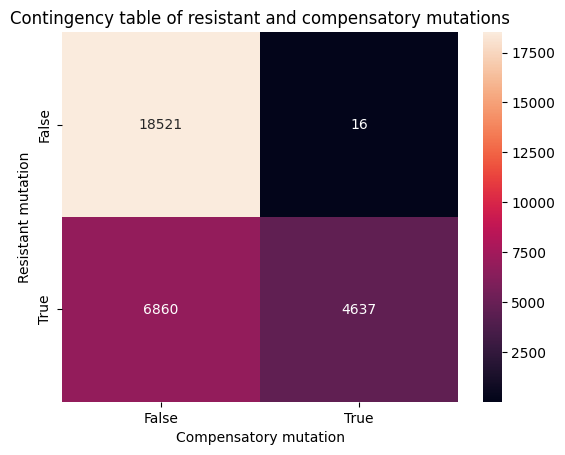

In [71]:
#check overall distribution of resistant and compensated samples
contingency = mutations.groupby('UNIQUEID')[['RESISTANT_MUTATION','COMPENSATORY_MUTATION']].max()

#make a contingency table for resistant UNQIUEIDs vs compensated UNIQUEIDs
contingency_table = pd.crosstab(contingency.RESISTANT_MUTATION, contingency.COMPENSATORY_MUTATION)
contingency_table

#plot the contingency table
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.xlabel('Compensatory mutation')
plt.ylabel('Resistant mutation')
plt.title('Contingency table of resistant and compensatory mutations')

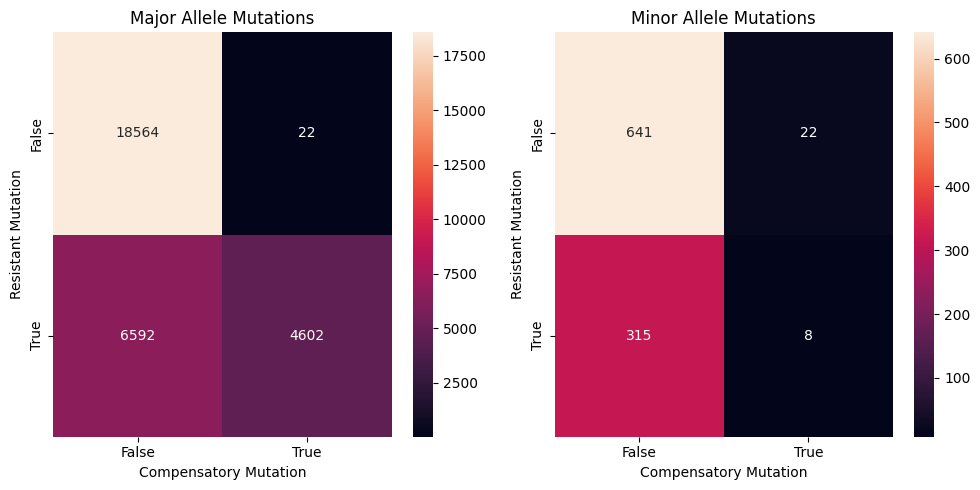

Major allele compensation ratio: 0.41111309630159015
Minor allele compensation ratio: 0.02476780185758514


In [72]:
#now we want to look at this in the groups of major and monor alleles separately: divide mutations dataset in major and minor resistant mutations
def plot_by_allele(mutations):
    major_mutations = mutations[mutations.IS_MINOR_ALLELE == False]
    minor_mutations = mutations[mutations.IS_MINOR_ALLELE == True]

    #group by UNIQUEIDs, since we have multiple mutations per UNIQUEID
    major_contingency = major_mutations.groupby('UNIQUEID')[['RESISTANT_MUTATION','COMPENSATORY_MUTATION']].max()
    minor_contingency = minor_mutations.groupby('UNIQUEID')[['RESISTANT_MUTATION','COMPENSATORY_MUTATION']].max()

    #make a contingency table for resistant UNQIUEIDs vs compensated UNIQUEIDs
    major_contingency_table = pd.crosstab(major_contingency.RESISTANT_MUTATION, major_contingency.COMPENSATORY_MUTATION)
    minor_contingency_table = pd.crosstab(minor_contingency.RESISTANT_MUTATION, minor_contingency.COMPENSATORY_MUTATION)

    #plot two heatmaps side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the major contingency table
    sns.heatmap(major_contingency_table, annot=True, fmt='d', ax=ax1)
    ax1.set_xlabel('Compensatory Mutation')
    ax1.set_ylabel('Resistant Mutation')
    ax1.set_title('Major Allele Mutations')

    # Plot the minor contingency table
    sns.heatmap(minor_contingency_table, annot=True, fmt='d', ax=ax2)
    ax2.set_xlabel('Compensatory Mutation')
    ax2.set_ylabel('Resistant Mutation')
    ax2.set_title('Minor Allele Mutations')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

    #calculate ratio of compensated samples in major vs minor resistant samples
    print("Major allele compensation ratio:",major_contingency_table.iloc[1,1] / (major_contingency_table.iloc[1,0] + major_contingency_table.iloc[1,1]))

    print("Minor allele compensation ratio:",minor_contingency_table.iloc[1,1] / (minor_contingency_table.iloc[1,0] + minor_contingency_table.iloc[1,1]))

plot_by_allele(mutations)


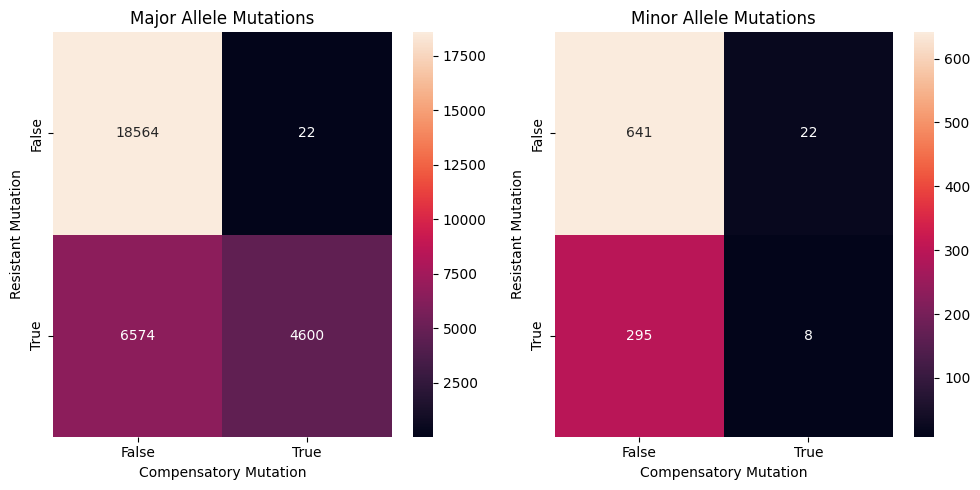

Major allele compensation ratio: 0.41166994809378915
Minor allele compensation ratio: 0.026402640264026403


In [74]:
#now we exclude the samples with minor alleles that also have major resistant mutations
mutations_non_overlap = mutations[~mutations.OVERLAP]
plot_by_allele(mutations_non_overlap)

In [233]:
#There could be multiple explanations, depending on the time-point of sampling:
# 1) the sample was taken during drug administration, and the resistant sub popualtion is only beginning to out-compete the sensitive population. Maybe the resistance was also acquired in the host. There is no need for compensation, as the antibiotic is present.
# 2) the sample was taken before antibiotic treatment, and 

In [75]:
mutations.FRS.value_counts()

FRS
0.333    236
0.500    226
0.250    203
0.200    176
0.667    147
        ... 
0.584      1
0.601      1
0.026      1
0.748      1
0.616      1
Name: count, Length: 869, dtype: int64

Now try to exclude samples with very low read support

<Axes: xlabel='FRS'>

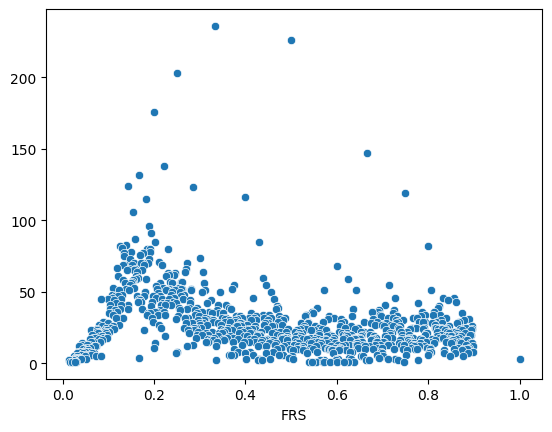

In [76]:
#Plot all mutations by FRS (if they have one reported)
#plot as a scatterplot of FRS vs count
sns.scatterplot(x=mutations.FRS.value_counts().index, y=mutations.FRS.value_counts().values)


<Axes: xlabel='FRS'>

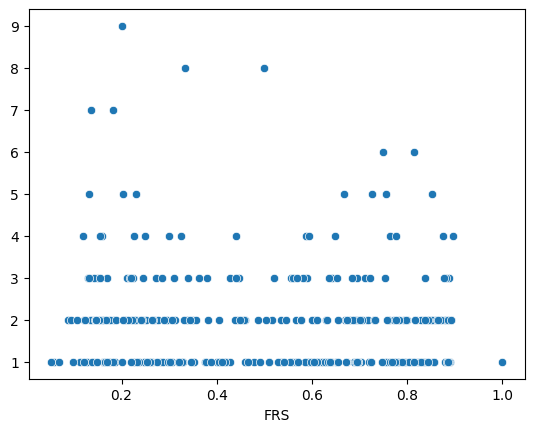

In [77]:
# plot the FRS of all resistant mutations
sns.scatterplot(x=mutations[mutations.RESISTANT_MUTATION == True].FRS.value_counts().index, y=mutations[mutations.RESISTANT_MUTATION == True].FRS.value_counts().values)


In [78]:
mutations

,UNIQUEID,GENE,MUTATION,REF,ALT,NUCLEOTIDE_NUMBER,NUCLEOTIDE_INDEX,GENE_POSITION,CODES_PROTEIN,INDEL_LENGTH,...,AMINO_ACID_SEQUENCE,NUMBER_NUCLEOTIDE_CHANGES,IS_MINOR_ALLELE,MINOR_MUTATION,FRS,GENE_MUTATION,RESISTANT_MUTATION,COMPENSATORY_MUTATION,PHENOTYPE,OVERLAP
0,site.01.subj.DR0682.lab.DR0682.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,...,L,1.0,False,NaN,NaN,rpoB_S450L,True,False,True,False
1,site.01.subj.DR0682.lab.DR0682.iso.1,rpoB,A1075A,gct,gcc,NaN,NaN,1075.0,True,NaN,...,A,1.0,False,NaN,NaN,rpoB_A1075A,False,False,True,False
2,site.01.subj.DR0674.lab.DR0674.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,...,L,1.0,False,NaN,NaN,rpoB_S450L,True,False,True,False
3,site.01.subj.DR0674.lab.DR0674.iso.1,rpoB,E561E,gag,gaa,NaN,NaN,561.0,True,NaN,...,E,1.0,False,NaN,NaN,rpoB_E561E,False,False,True,False
4,site.01.subj.DR0134.lab.DR0134.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,...,L,1.0,False,NaN,NaN,rpoB_S450L,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152195,site.07.subj.FD_127_5585.lab.14_0600162.iso.1,rpoC,G594E,ggg,gag,NaN,NaN,594.0,True,NaN,...,E,1.0,False,NaN,NaN,rpoC_G594E,False,False,False,False
152196,site.07.subj.C32A080B-63AC-4427-9257-073281798...,rpoC,T893T,acc,acg,NaN,NaN,893.0,True,NaN,...,T,1.0,False,NaN,NaN,rpoC_T893T,False,False,False,False
152197,site.07.subj.C32A080B-63AC-4427-9257-073281798...,rpoB,G876G,ggt,ggg,NaN,NaN,876.0,True,NaN,...,G,1.0,False,NaN,NaN,rpoB_G876G,False,False,False,False
152198,site.07.subj.C32A080B-63AC-4427-9257-073281798...,rpoB,A1075A,gct,gcc,NaN,NaN,1075.0,True,NaN,...,A,1.0,False,NaN,NaN,rpoB_A1075A,False,False,False,False


In [79]:
mutations.FRS.isna()

0         True
1         True
2         True
3         True
4         True
          ... 
152195    True
152196    True
152197    True
152198    True
152199    True
Name: FRS, Length: 152200, dtype: bool

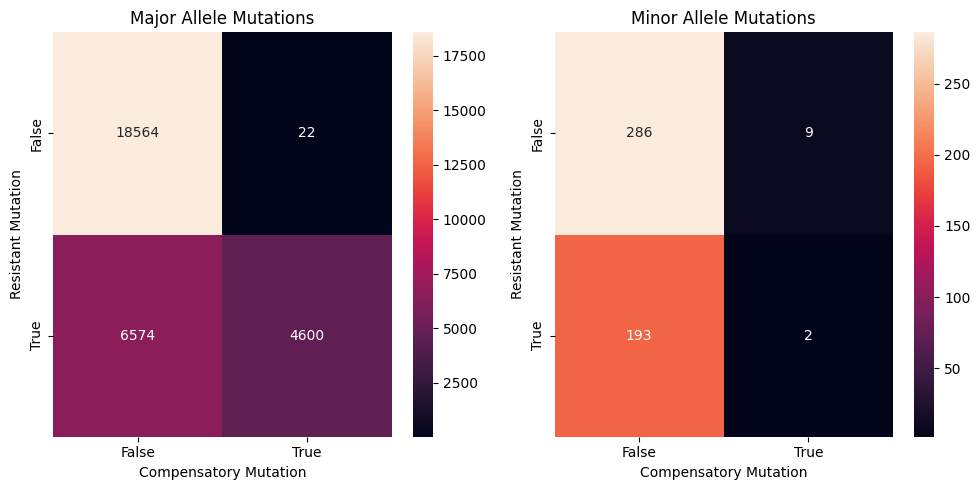

Major allele compensation ratio: 0.41166994809378915
Minor allele compensation ratio: 0.010256410256410256


In [102]:
#exclude mutations with FRS < 0.5 and perform the same analysis
mutations_non_overlap = mutations[~mutations.OVERLAP]
mutations_filtered = mutations_non_overlap[(mutations_non_overlap.FRS >= 0.5) | (mutations_non_overlap.FRS.isna())]
plot_by_allele(mutations_filtered)
# mutations_filtered

Check the phenotypic resistance of minor allele resistant samples

In [83]:
#aggregate mutations table based on UNIQUEID (keep resistant_mutation, compensatory_mutation, phenotype IS_MINOR_ALLELE	and FRS flags)
def aggregate_minor_major_allele(group):
    # Check if any row has both IS_MINOR_ALLELE == True and RESISTANT_MUTATION == True
    minor_allele_flag = any((group['IS_MINOR_ALLELE'] == True) & (group['RESISTANT_MUTATION'] == True))
    major_allele_flag = any((group['IS_MINOR_ALLELE'] == False) & (group['RESISTANT_MUTATION'] == True))
    
    return pd.Series({
        'RESISTANT_MUTATION': group['RESISTANT_MUTATION'].max(),
        'COMPENSATORY_MUTATION': group['COMPENSATORY_MUTATION'].max(),
        'PHENOTYPE': group['PHENOTYPE'].max(),
        'R_MINOR_ALLELE': minor_allele_flag,
        'R_MAJOR_ALLELE': major_allele_flag,
        'FRS': group['FRS'].max(),
    })

# Apply the custom aggregation function
mutations_agg = mutations.groupby('UNIQUEID').apply(aggregate_minor_major_allele).reset_index()
# mutations_agg = mutations.groupby('UNIQUEID').agg(
#     RESISTANT_MUTATION = ('RESISTANT_MUTATION', 'max'),
#     COMPENSATORY_MUTATION = ('COMPENSATORY_MUTATION', 'max'),
#     PHENOTYPE = ('PHENOTYPE', 'max'),
#     IS_MINOR_ALLELE = ('IS_MINOR_ALLELE', 'max'),
#     FRS = ('FRS', 'max')
# ).reset_index()
# mutations_agg = mutations.groupby('UNIQUEID').agg(
#     RESISTANT_MUTATION = ('RESISTANT_MUTATION', 'max'),
#     COMPENSATORY_MUTATION = ('COMPENSATORY_MUTATION', 'max'),
#     PHENOTYPE = ('PHENOTYPE', 'max')
# ).reset_index()

mutations_agg

/var/folders/_3/8y_dwngx2614_y_52fzh1c4w0000gn/T/ipykernel_2371/4150554343.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mutations_agg = mutations.groupby('UNIQUEID').apply(aggregate_minor_major_allele).reset_index()


,UNIQUEID,RESISTANT_MUTATION,COMPENSATORY_MUTATION,PHENOTYPE,R_MINOR_ALLELE,R_MAJOR_ALLELE,FRS
0,site.00.subj.1000347.lab.H111540004.iso.1,True,False,True,False,True,NaN
1,site.00.subj.1000595.lab.H123460044.iso.1,True,True,True,False,True,NaN
2,site.00.subj.1004213.lab.H111060034.iso.1,True,True,True,False,True,NaN
3,site.00.subj.1004213.lab.H112000008.iso.1,True,True,True,False,True,NaN
4,site.00.subj.1004213.lab.H113100007.iso.1,True,True,True,False,True,NaN
...,...,...,...,...,...,...,...
30029,site.35.subj.95.lab.IE19.iso.1,True,True,True,False,True,NaN
30030,site.35.subj.96.lab.IE20.iso.1,True,False,True,False,True,NaN
30031,site.35.subj.97.lab.IE21.iso.1,True,False,True,False,True,NaN
30032,site.35.subj.98.lab.IE22.iso.1,True,False,True,False,True,NaN


In [84]:
mutations_agg[(mutations_agg.RESISTANT_MUTATION ==  True) & (mutations_agg.PHENOTYPE == True) & (mutations_agg.IS_MINOR_ALLELE == True)]

AttributeError: 'DataFrame' object has no attribute 'IS_MINOR_ALLELE'

In [100]:
len(mutations_agg[(mutations_agg.R_MAJOR_ALLELE == False) & (mutations_agg.R_MINOR_ALLELE == True) & (mutations_agg.COMPENSATORY_MUTATION == False) & (mutations_agg.PHENOTYPE == True) & (mutations_agg.FRS >= 0.2)]) #& (mutations_agg.PHENOTYPE == True) & (mutations_agg.R_MINOR_ALLELE == True) & (mutations_agg.COMPENSATORY_MUTATION == True)

223